In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
import seaborn as sns

In [2]:
df = pd.read_csv(r'/home/mllab/Breast_cancer_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [4]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [5]:
print(df)

     mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     diagnosis  
0            0  
1            0  
2           

In [6]:
print(df.isnull().sum())

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64


In [7]:
corr_matrix = df.corr()
corr_with_target = corr_matrix['diagnosis'].sort_values(ascending = True)

In [8]:
corr_with_target

mean_perimeter    -0.742636
mean_radius       -0.730029
mean_area         -0.708984
mean_texture      -0.415185
mean_smoothness   -0.358560
diagnosis          1.000000
Name: diagnosis, dtype: float64

In [9]:
threshold = 0.25
corr_features = corr_with_target[abs(corr_with_target) > threshold].index

In [10]:
print("Selected Features Based on Correlation Matrix with threshold = 0.25\n")
for feature in corr_features:
    print(f'Feature : {feature}\n')

Selected Features Based on Correlation Matrix with threshold = 0.25

Feature : mean_perimeter

Feature : mean_radius

Feature : mean_area

Feature : mean_texture

Feature : mean_smoothness

Feature : diagnosis



In [11]:
cols = df.columns.tolist()

In [12]:
for col in cols:
    if col not in corr_features:
        df = df.drop(col, axis = 1)

In [13]:
not_harm = df[df['diagnosis'] == 0]
harm = df[df['diagnosis'] == 1]

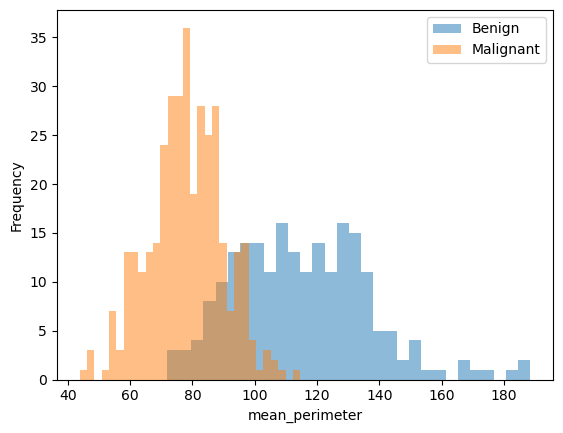

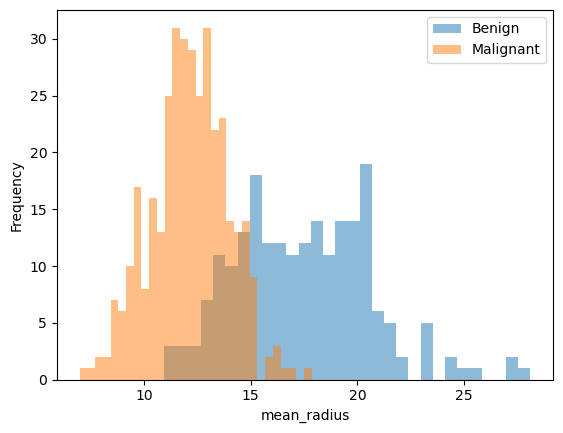

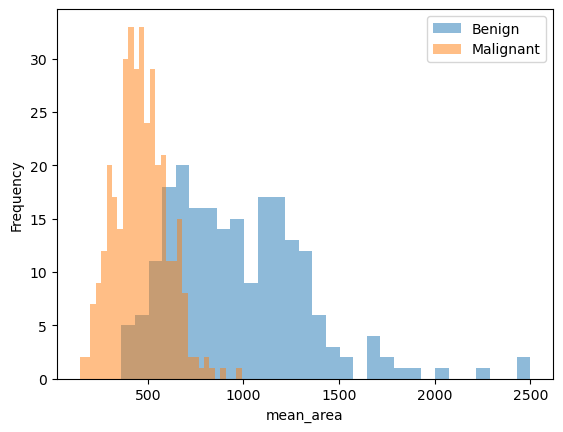

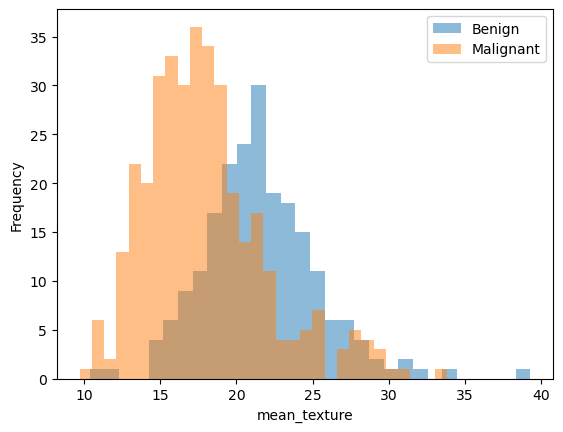

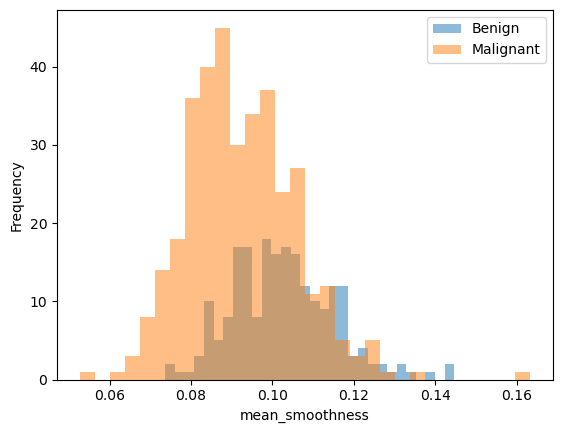

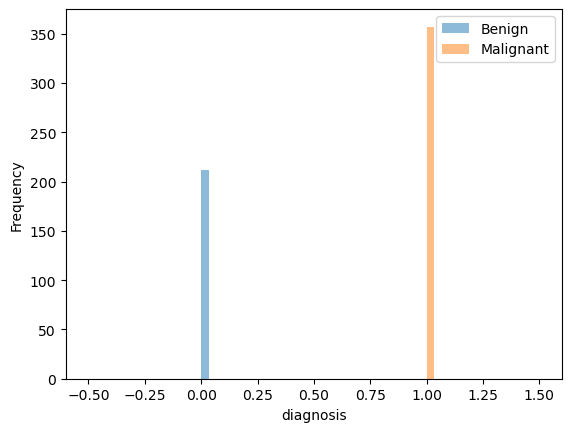

In [14]:
for col in corr_features:
    plt.figure()
    plt.hist(not_harm[col], bins = 30, alpha = 0.5, label = "Benign")
    plt.hist(harm[col], bins = 30, alpha = 0.5, label = "Malignant")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

In [15]:
X = df.iloc[ : , :-1]
Y = df.iloc[ : , -1]
X = X.values
Y = Y.values

In [16]:
X_train, X_test, Y_train, Y_test = tts(X, Y, random_state = 104, test_size = 0.20, shuffle = True)
print(X_train.shape)
print(Y_train.shape)

(455, 5)
(455,)


In [17]:
np.reshape(Y_train, (X_train.shape[0], 1))
np.reshape(Y_test, (X_test.shape[0], 1))

array([[0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
    

In [18]:
def giniIndex(y):
    classes, counts = np.unique(y, return_counts = True)
    gini_impurity = 1
    for count in counts:
        propability = count / len(y)
        gini_impurity -= propability ** 2
    return gini_impurity

In [19]:
def split(X, Y, limit, feature_index):
    left_side = X[ : , feature_index] <= limit
    right_side = X[ : , feature_index] > limit
    
    return X[left_side], X[right_side], Y[left_side], Y[right_side]

In [20]:
def find_best_split(X, Y):
    best_gini = float('inf')
    best_split = None
    
    features = X.shape[1]
    for feature in range(features):
        limits = np.unique(X[ : , feature])
        for limit in limits:
            X_left, X_right, Y_left, Y_right = split(X, Y, limit, feature)
            
            if len(Y_left) == 0 or len(Y_right) == 0:
                continue
            
            giniLeft = giniIndex(Y_left)
            giniRight = giniIndex(Y_right)
            
            num = len(Y_left) * giniLeft + len(Y_right) * giniRight
            den = len(Y_left) + len(Y_right)
            
            weighted_gini = num / den
            
            if weighted_gini < best_gini:
                best_gini = weighted_gini
                best_split = {
                    'feature_index' : feature,
                    'limit' : limit, 
                    'X_left' : X_left, 
                    'X_right' :X_right, 
                    'Y_left' : Y_left, 
                    'Y_right' : Y_right
                } 
    return best_split

In [21]:
def build_tree(X, Y, cur_depth = 0, max_depth = None, min_splits = 2):
    
    n, m = X.shape

    # base case
    if cur_depth >= max_depth or len(np.unique(Y)) == 1 or n < min_splits:
        return np.bincount(Y).argmax()
    
    best_split = find_best_split(X, Y)
    if best_split is None:
        return np.bincount(Y).argmax()
    
    left_subtree = build_tree(best_split['X_left'], best_split['Y_left'], cur_depth + 1, max_depth, min_splits)
    right_subtree = build_tree(best_split['X_right'], best_split['Y_right'], cur_depth + 1, max_depth, min_splits)
    
    return {
        'feature_index' : best_split['feature_index'],
        'limit' : best_split['limit'],
        'left' : left_subtree, 
        'right' : right_subtree
    }

In [22]:
def predict_sample(X, tree):
    if isinstance(tree, dict):
        feature_value = X[tree['feature_index']]
        if feature_value <= tree['limit']:
            return predict_sample(X, tree['left'])
        else:
            return predict_sample(X, tree['right'])
    else:
        # in case of leaf node just return the output
        return tree
    
def predict(X, tree):
    return [predict_sample(x, tree) for x in X]

In [23]:
tree = build_tree(X_train, Y_train, 0, max_depth = 5, min_splits = 2)

Y_pred = predict(X_test, tree)

In [24]:
tree

{'feature_index': 2,
 'limit': 99.58,
 'left': {'feature_index': 2,
  'limit': 90.03,
  'left': {'feature_index': 4,
   'limit': 0.1078,
   'left': {'feature_index': 2,
    'limit': 85.31,
    'left': {'feature_index': 1, 'limit': 18.1, 'left': 1, 'right': 1},
    'right': {'feature_index': 1, 'limit': 19.24, 'left': 1, 'right': 1}},
   'right': {'feature_index': 2,
    'limit': 77.23,
    'left': {'feature_index': 1, 'limit': 18.33, 'left': 1, 'right': 1},
    'right': {'feature_index': 1, 'limit': 14.65, 'left': 1, 'right': 0}}},
  'right': {'feature_index': 4,
   'limit': 0.09179,
   'left': {'feature_index': 1,
    'limit': 26.99,
    'left': {'feature_index': 1, 'limit': 22.68, 'left': 1, 'right': 1},
    'right': 0},
   'right': {'feature_index': 1,
    'limit': 16.74,
    'left': {'feature_index': 0, 'limit': 13.8, 'left': 0, 'right': 1},
    'right': {'feature_index': 1, 'limit': 25.74, 'left': 0, 'right': 0}}}},
 'right': {'feature_index': 1,
  'limit': 16.07,
  'left': {'feat

In [25]:
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)

In [26]:
print(f'Accuracy : {accuracy : .4f}')
print(f'Precision : {precision : .4f}')
print(f'Recall : {recall : .4f}')
print(f'Confusion Matrix :\n{conf_matrix}')

Accuracy :  0.9035
Precision :  0.9143
Recall :  0.9275
Confusion Matrix :
[[39  6]
 [ 5 64]]


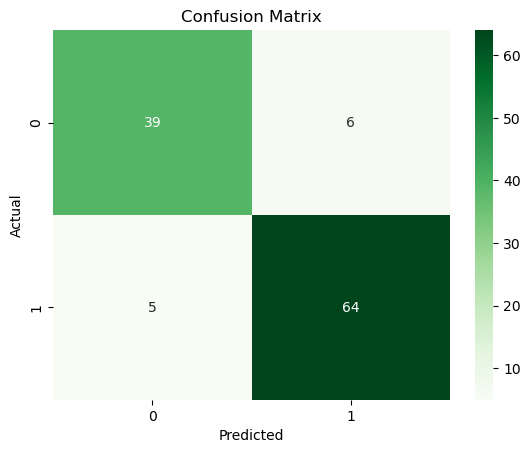

In [27]:
# visualise the confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = "Greens")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

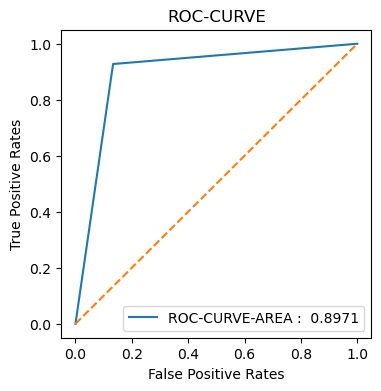

In [28]:
# plot roc curve
fpr, tpr, _ = roc_curve(Y_test, Y_pred)
roc_area = auc(fpr, tpr)
plt.figure(figsize = (4, 4))
plt.plot(fpr, tpr, label = f"ROC-CURVE-AREA : {roc_area : .4f}")
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.title('ROC-CURVE')
plt.xlabel('False Positive Rates')
plt.ylabel('True Positive Rates')
plt.legend()
plt.show()